# Objectif:
 Build a predictive model that predict if a passenger is likely to survive.

# 1. Setting Up environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [2]:
pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Loading data

In [43]:
data = pd.read_csv("titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Data Overview

In [4]:
data.shape

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [11]:
data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# 4. Data wrangling

In [44]:
# removing irrelevant features
data.drop(["PassengerId", "Cabin", "Ticket", "Name"], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [45]:
# Dealing with missing value
# for "Age" assign average age  to missing vavlue
data["Age"].replace(np.nan, data["Age"].mean(), inplace=True)
# for "Embarked" replace with most frequent value
data["Embarked"].replace(np.nan, "S", inplace=True)
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 146.1 KB


In [16]:
data.sample(n=15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
882,0,3,female,22.000000,0,0,10.5167,S
145,0,2,male,19.000000,1,1,36.7500,S
505,0,1,male,18.000000,1,0,108.9000,C
181,0,2,male,29.699118,0,0,15.0500,C
524,0,3,male,29.699118,0,0,7.2292,C
753,0,3,male,23.000000,0,0,7.8958,S
828,1,3,male,29.699118,0,0,7.7500,Q
607,1,1,male,27.000000,0,0,30.5000,S
111,0,3,female,14.500000,1,0,14.4542,C
879,1,1,female,56.000000,0,1,83.1583,C


# 5. EDA

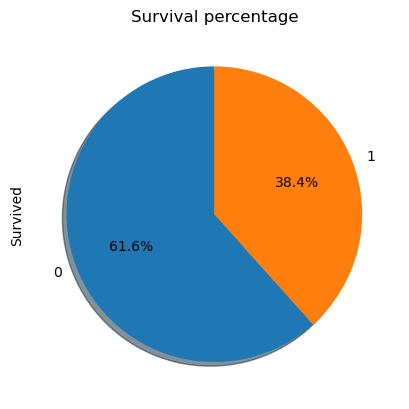

In [17]:
# plotting survival percentages
df = data["Survived"].value_counts() 
df.plot(kind="pie",
        y="Survived",
        autopct='%1.1f%%',
        startangle=90, shadow=True)
plt.title("Survival percentage")
plt.show()

<Axes: >

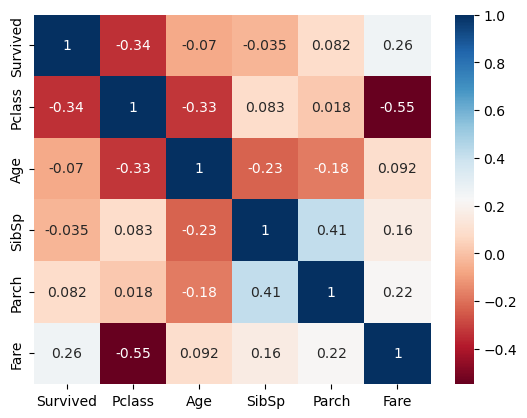

In [18]:
# correlation table
df=data.corr()
sns.heatmap(df, cmap="RdBu", annot=True)

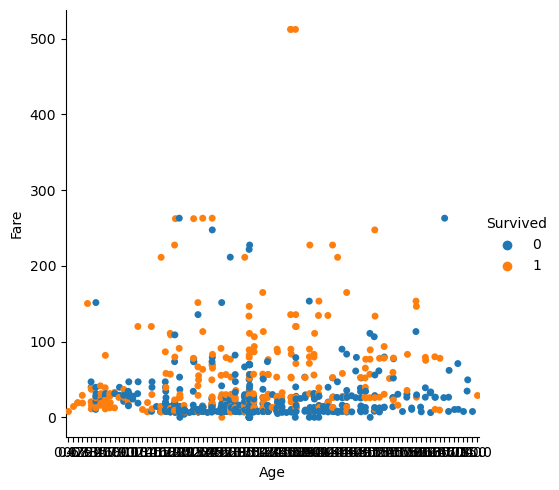

In [19]:
# Age and Fare in relation to survival
sns.catplot(data=data, x="Age", y="Fare", hue="Survived")
plt.show()

### Note :
1. The Age and Fare Variables aren't correlated to Survived 
2. Remove both features 

In [46]:
data.drop(["Age"], axis=1, inplace=True)
data.drop(["Fare"], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


## Note 
we will use the chi-square method to look for relationship between survival and the rest of the features

In [21]:
chi2,p_value, dof, cout =  scipy.stats.chi2_contingency(pd.crosstab(index=data["Pclass"], columns=data["Survived"]), correction=True)
print(p_value)

4.549251711298793e-23


In [22]:
chi2,p_value, dof, cout =  scipy.stats.chi2_contingency(pd.crosstab(index=data["Sex"], columns=data["Survived"]), correction=True)
print(p_value)

1.1973570627755645e-58


In [23]:
chi2,p_value, dof, cout =  scipy.stats.chi2_contingency(pd.crosstab(index=data["SibSp"], columns=data["Survived"]), correction=True)
print(p_value)

1.5585810465902147e-06


In [24]:
chi2,p_value, dof, cout =  scipy.stats.chi2_contingency(pd.crosstab(index=data["Parch"], columns=data["Survived"]), correction=True)
print(p_value)

9.703526421039997e-05


In [25]:
chi2,p_value, dof, cout =  scipy.stats.chi2_contingency(pd.crosstab(index=data["Embarked"], columns=data["Survived"]), correction=True)
print(p_value)

2.3008626481449577e-06


## Note:
- given the previous P-value are all  less than the significance level (0.05)
- therfore all the remaining features and Survived are dependants .

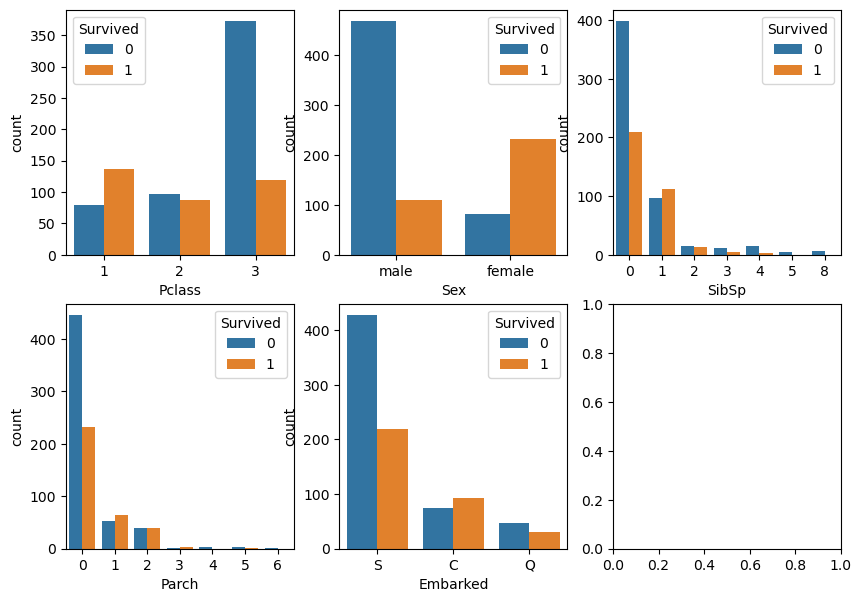

In [26]:
# plotting the relationship between survival and each feature
fig, ax_array = plt.subplots(2, 3 ,figsize=(10, 7))
(ax1,ax2,ax3), (ax4,ax5,ax6)=ax_array

sns.countplot(ax=ax1, data=data, x=data["Pclass"], hue=data["Survived"])
sns.countplot(ax=ax2, data=data, x=data["Sex"], hue=data["Survived"])
sns.countplot(ax=ax3, data=data, x=data["SibSp"], hue=data["Survived"])
sns.countplot(ax=ax4,data=data, x=data["Parch"], hue=data["Survived"])
sns.countplot(ax=ax5, data=data, x=data["Embarked"], hue=data["Survived"])

plt.show()

 ### Create dummy variables to categorical columns

In [47]:
data = data.assign(
    Pclass = data["Pclass"].astype("category"),
    Sex = data["Sex"].astype("category"),
    SibSp = data["SibSp"].astype("category"),
    Parch = data["Parch"].astype("category"),
    Embarked = data["Embarked"].astype("category")
)
dumm = pd.get_dummies(data[["Pclass", "Sex", "SibSp", "Parch", "Embarked"]],
                      prefix=["Class", "Sex", "Sib", "Parch", "Embarked"])

data.drop(["Pclass", "Sex", "SibSp", "Parch", "Embarked"], axis=1, inplace=True)
data = pd.concat([data, dumm], axis=1)
data.head()

,Survived,Class_1,Class_2,Class_3,Sex_female,Sex_male,Sib_0,Sib_1,Sib_2,Sib_3,Sib_4,Sib_5,Sib_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Class_1     891 non-null    uint8
 2   Class_2     891 non-null    uint8
 3   Class_3     891 non-null    uint8
 4   Sex_female  891 non-null    uint8
 5   Sex_male    891 non-null    uint8
 6   Sib_0       891 non-null    uint8
 7   Sib_1       891 non-null    uint8
 8   Sib_2       891 non-null    uint8
 9   Sib_3       891 non-null    uint8
 10  Sib_4       891 non-null    uint8
 11  Sib_5       891 non-null    uint8
 12  Sib_8       891 non-null    uint8
 13  Parch_0     891 non-null    uint8
 14  Parch_1     891 non-null    uint8
 15  Parch_2     891 non-null    uint8
 16  Parch_3     891 non-null    uint8
 17  Parch_4     891 non-null    uint8
 18  Parch_5     891 non-null    uint8
 19  Parch_6     891 non-null    uint8
 20  Embarked_C  891 non-null    uint

# 6. Machine Learning Prediction

In [30]:
# This function is used to plot the confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not Survived', 'Survived']); ax.yaxis.set_ticklabels(['did not Survived', 'Survived']) 
    plt.show() 

## 6.1 Data preprocessing

In [48]:
X = data.drop(["Survived"], axis=1)
Y = data['Survived']

In [50]:
from sklearn import preprocessing
X = preprocessing.normalize(X, norm='l2')

In [52]:
Y = data['Survived'].to_numpy()


In [53]:
# Split data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

## 6.2 models trainig and evaluation

- We will test 5 models (KNN, DT classifier, logistic regression, Naive Bayes, Random forest classifir)
- for each we will test with different parameters to try to find the best hyperparameters using grid search

In [54]:
# hyperparameters 
knn_param = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

dtc_param = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

lr_param = parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

nb_param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

rfc_param = params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

In [55]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

### 1 KNN

best hpyerparameters  {'algorithm': 'kd_tree', 'n_neighbors': 10, 'p': 1}
mean cross_validation_score : 0.8025101763907733
test accuracy :0.7982062780269058


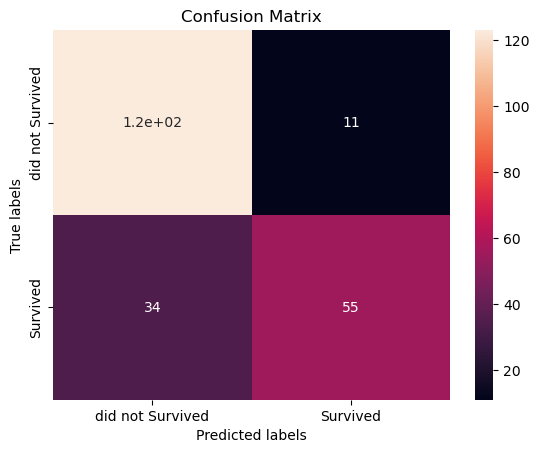

In [56]:
knn_cv = GridSearchCV(knn, knn_param, cv=10)
knn_cv.fit(X_train, Y_train)
print("best hpyerparameters ",knn_cv.best_params_)
print("mean cross_validation_score :",knn_cv.best_score_)
acc = knn_cv.score(X_test, Y_test)
print(f"test accuracy :{acc}")
yhat=knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       134
           1       0.83      0.62      0.71        89

    accuracy                           0.80       223
   macro avg       0.81      0.77      0.78       223
weighted avg       0.80      0.80      0.79       223



### 2 Tree decision classifier

best parameters : {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
mean cross_validation_score = 0.8115106286748077
test accuracy =0.7802690582959642


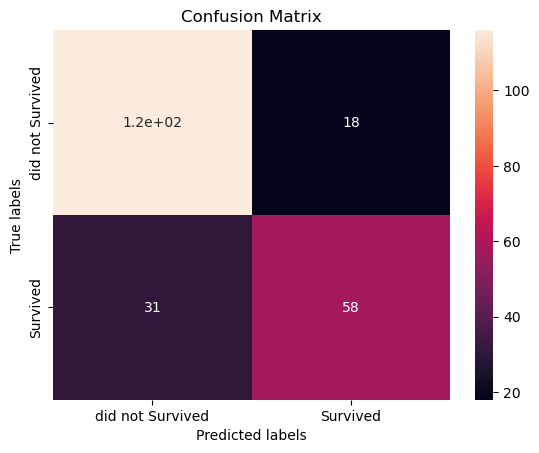

In [58]:
dtree_cv = GridSearchCV(dtree, dtc_param, cv=10)
dtree_cv.fit(X_train, Y_train)
print(f"best parameters : {dtree_cv.best_params_}")
print(f"mean cross_validation_score = {dtree_cv.best_score_}")
acc = dtree_cv.score(X_test, Y_test)
print(f"test accuracy ={acc}")
yhat = dtree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [59]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       134
           1       0.76      0.65      0.70        89

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



### 3 Logistic regression

best parameters : {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
mean cross_validation_score = 0.7905020352781545
test score =0.7892376681614349


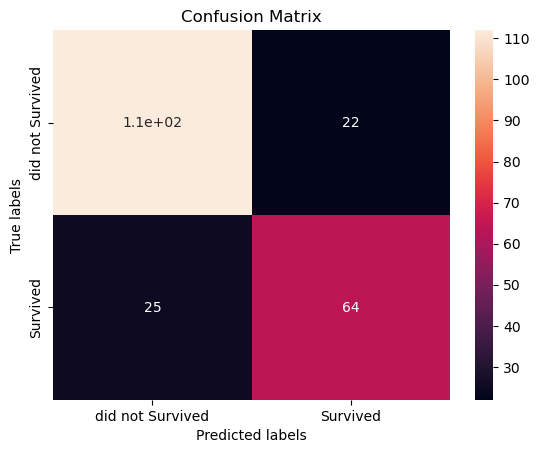

In [60]:
lr_cv = GridSearchCV(lr, lr_param, cv=10)
lr_cv.fit(X_train, Y_train)
print(f"best parameters : {lr_cv.best_params_}")
print(f"mean cross_validation_score = {lr_cv.best_score_}")
acc = lr_cv.score(X_test, Y_test)
print(f"test score ={acc}")
yhat = lr_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [61]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       134
           1       0.74      0.72      0.73        89

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



### 4 Naive Bayes

best parameters : {'alpha': 1}
mean cross_validation_score = 0.7784712799638173
test score =0.7668161434977578


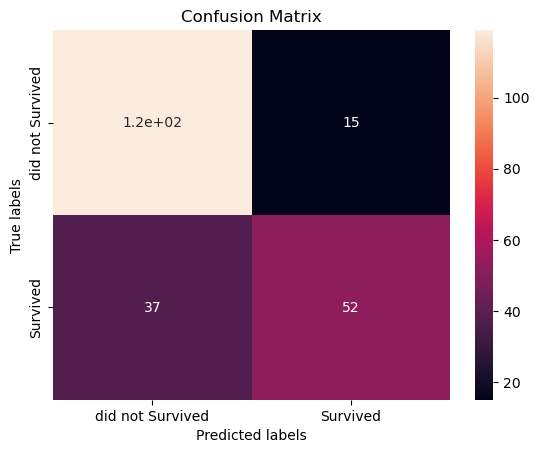

In [62]:
nb_cv = GridSearchCV(nb, nb_param, cv=10)
nb_cv.fit(X_train, Y_train)
print(f"best parameters : {nb_cv.best_params_}")
print(f"mean cross_validation_score = {nb_cv.best_score_}")
acc = nb_cv.score(X_test, Y_test)
print(f"test score ={acc}")
yhat = nb_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [63]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       134
           1       0.78      0.58      0.67        89

    accuracy                           0.77       223
   macro avg       0.77      0.74      0.74       223
weighted avg       0.77      0.77      0.76       223



### 5 Random Forest Classifier

best hpyerparameters  {'bootstrap': True, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
mean cross_validation_score : 0.8025554047942108
after refit accuracy :0.8071748878923767


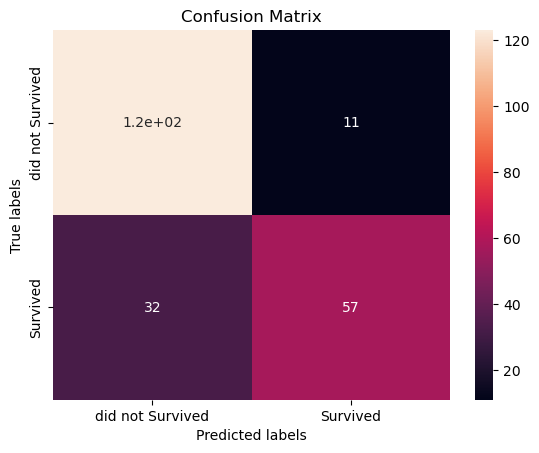

In [64]:
rfc_cv = GridSearchCV(rfc, rfc_param, cv=10)
rfc_cv.fit(X_train, Y_train)
print("best hpyerparameters ",rfc_cv.best_params_)
print("mean cross_validation_score :",rfc_cv.best_score_)
acc = rfc_cv.score(X_test, Y_test)
print(f"after refit accuracy :{acc}")
yhat=rfc_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [65]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       134
           1       0.84      0.64      0.73        89

    accuracy                           0.81       223
   macro avg       0.82      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223



#### we will try with the voting classifier

first we assign the best parameter for each classifier


In [66]:

knn = KNeighborsClassifier(algorithm='kd_tree',
                           n_neighbors=10,
                           p=1)

dtree = DecisionTreeClassifier(criterion='entropy',
                               max_depth=8,
                               max_features='sqrt',
                               min_samples_leaf=4,
                               min_samples_split=10,
                               splitter='best')

lr = LogisticRegression(C=1,
                        penalty='l2',
                        solver='lbfgs')


nb = MultinomialNB(alpha=1)

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             max_features='sqrt',
                             min_samples_leaf=5,
                             min_samples_split=5,
                             n_estimators=200)

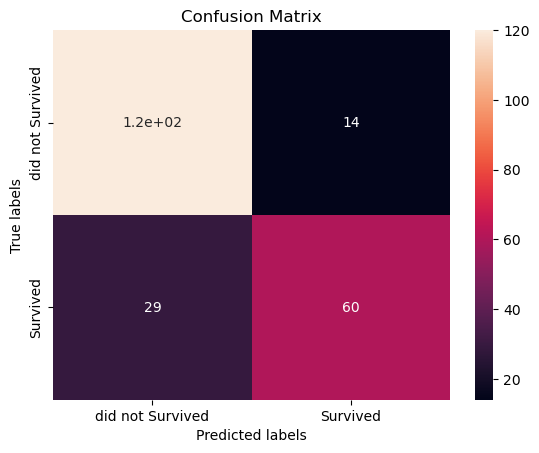

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       134
           1       0.81      0.67      0.74        89

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223



In [82]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('mnb',nb),('lr',lr),('rf',rfc),('knn',knn),('dt', dtree)],
                      voting='hard',
                      weights=(1, 1.5, 1.25, 1, 1)
                     )
vc.fit(X_train, Y_train)
yhat=vc.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
print(classification_report(Y_test, yhat))


Next we train the model on the whole data

In [83]:
vc.fit(X, Y)

VotingClassifier(estimators=[('mnb', MultinomialNB(alpha=1)),
                             ('lr', LogisticRegression(C=1)),
                             ('rf',
                              RandomForestClassifier(max_depth=7,
                                                     min_samples_leaf=5,
                                                     min_samples_split=5,
                                                     n_estimators=200)),
                             ('knn',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   n_neighbors=10, p=1)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features='sqrt',
                                                     min_samples_leaf=4,
                                                     min_samples_split=10))],
                 weights=(1, 1.5, 1.25, 1, 1))

# Predict on the test dataset

In [126]:
test_data = pd.read_csv("titanic_test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [127]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

x_test = test_data[features]
x_test["Parch"].replace(9, 0, inplace=True)
x_test.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,0,0,Q
1,3,female,1,0,S
2,2,male,0,0,Q
3,3,male,0,0,S
4,3,female,1,1,S


In [128]:
x_test["Parch"].value_counts()

0    326
1     52
2     33
3      3
4      2
6      1
5      1
Name: Parch, dtype: int64

In [129]:
x_test = x_test.assign(
    Pclass = x_test["Pclass"].astype("category"),
    Sex = x_test["Sex"].astype("category"),
    SibSp = x_test["SibSp"].astype("category"),
    Parch = x_test["Parch"].astype("category"),
    Embarked = x_test["Embarked"].astype("category")
)


In [130]:
dumm = pd.get_dummies(x_test[["Pclass", "Sex", "SibSp", "Parch", "Embarked"]],
                      prefix=["Class", "Sex", "Sib", "Parch", "Embarked"])



In [131]:
x_test.drop(["Pclass", "Sex", "SibSp", "Parch", "Embarked"], axis=1, inplace=True)
x_test = pd.concat([x_test, dumm], axis=1)
x_test.shape

(418, 22)

In [132]:

predictions = vc.predict(x_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
